In [1]:
from pathlib import Path

THIS = Path(".")
BASE = THIS / ".."
BASE = BASE.absolute().resolve()

MODEL = BASE / "model"
EXPORTS = BASE / "exports"

MODEL_NAME="Llama-2-7b-hf"



MODEL_PATH = MODEL / MODEL_NAME
EXPORTS = EXPORTS / MODEL_NAME

# Engine

## GPTQ - Benchmarking

In [3]:
METHOD = "quant/gptq"
METHOD_EXPORTS = EXPORTS / METHOD


In [4]:
# print paths
print("BASE:", BASE)
print("MODEL:", MODEL)
print("MODEL_PATH:", MODEL_PATH)
print("METHOD_EXPORTS:", METHOD_EXPORTS)

BASE: /home/shwu/LLM-Efficiency-Survey
MODEL: /home/shwu/LLM-Efficiency-Survey/model
MODEL_PATH: /home/shwu/LLM-Efficiency-Survey/model/Llama-2-7b-hf
METHOD_EXPORTS: /home/shwu/LLM-Efficiency-Survey/exports/Llama-2-7b-hf/quant/gptq


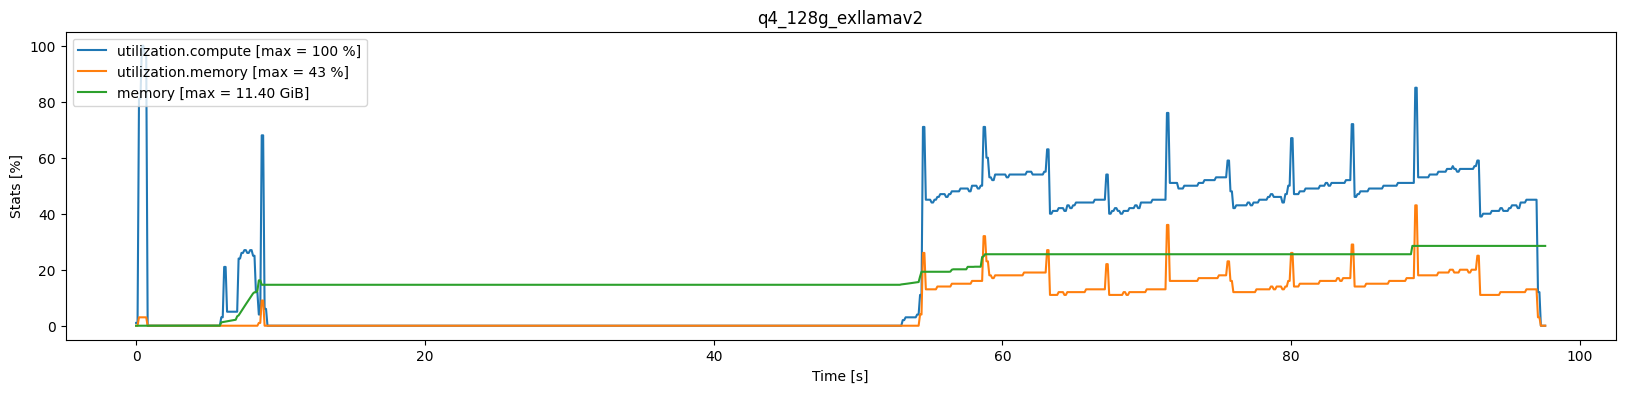

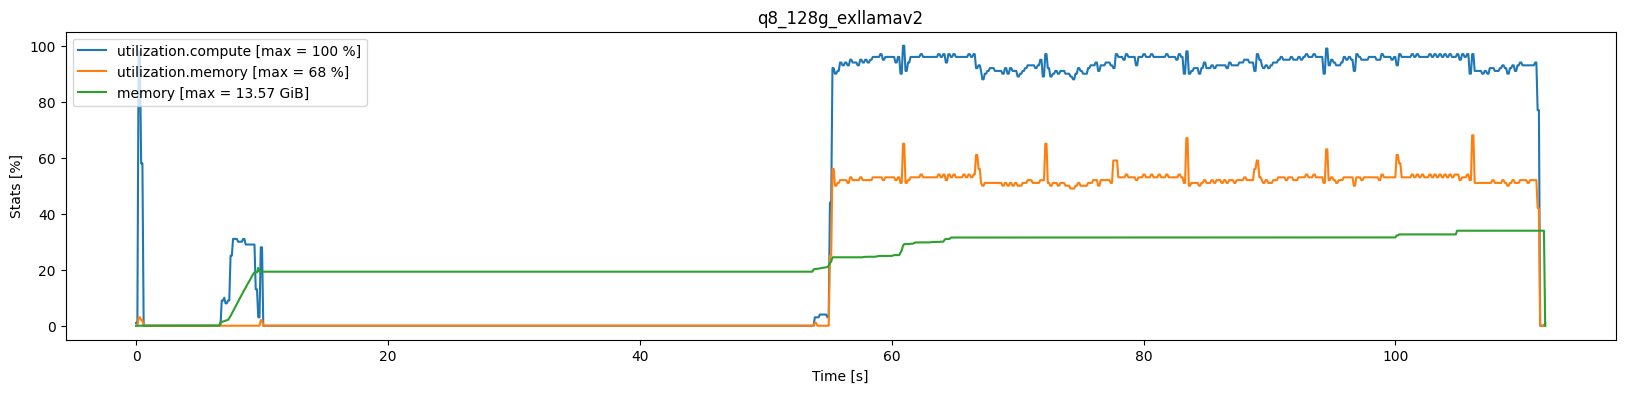

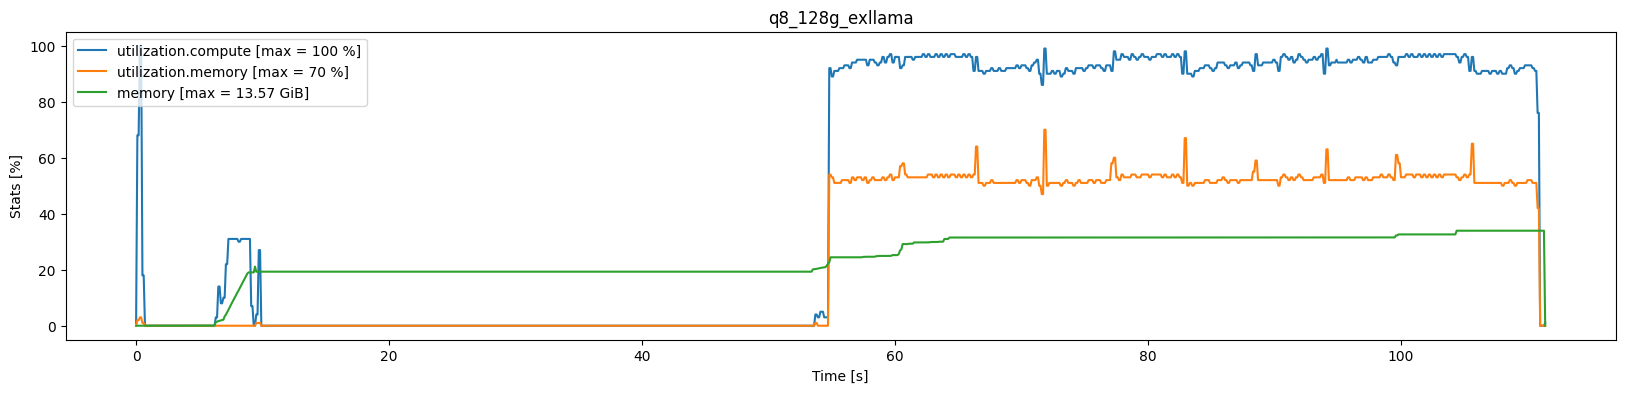

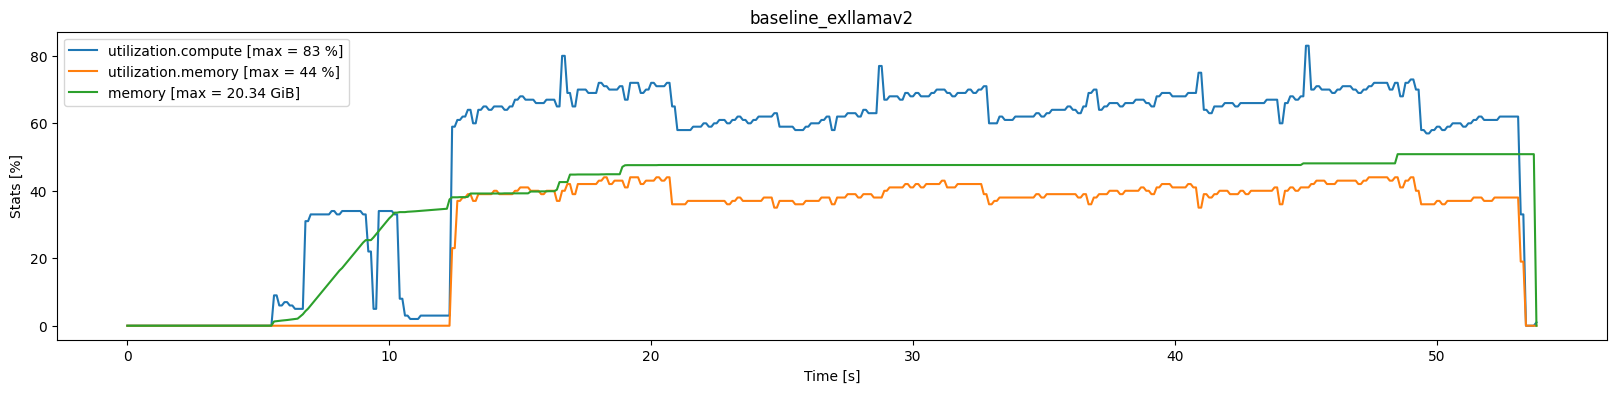

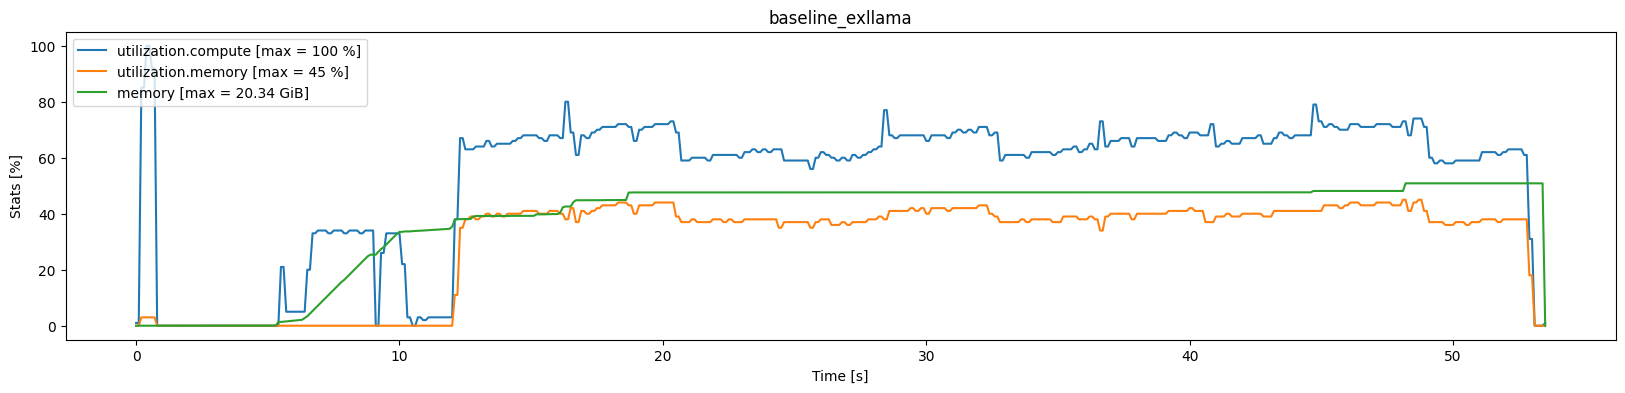

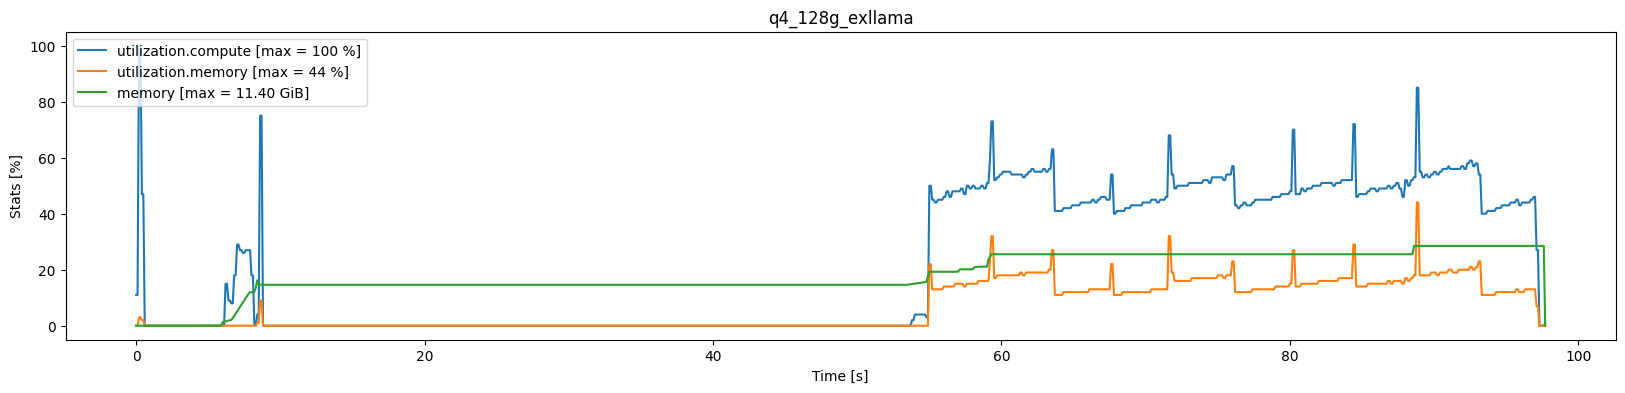

In [13]:
# max mem usage
import pandas as pd
import matplotlib.pyplot as plt
all_csvs = list(METHOD_EXPORTS.glob("*.csv"))

# csv header
# utilization.gpu [%], utilization.memory [%], memory.used [MiB], memory.free [MiB], memory.total [MiB]
utlization_gpu_key = "utilization.gpu [%]"
utilization_memory_key = " " + "utilization.memory [%]"
memory_used_key = " " + "memory.used [MiB]"
memory_free_key = " " + "memory.free [MiB]"
memory_total_key = " " + "memory.total [MiB]"

for csv in all_csvs:
    if not "bench" in csv.name:
        continue
    df = pd.read_csv(csv)

    # plot csv of utilization.memory [%] and utilization.gpu [%] both on y-axis
    fig, ax1 = plt.subplots(figsize=(20, 4))
    plt.title(csv.name.split('usage')[-1][1:-4])
    ax1.set_ylabel("Stats [%]")
    ax1.set_xlabel("Time [s]")
    ax1.plot(df.index * 0.1, df[utlization_gpu_key], label=f"utilization.compute [max = {df[utlization_gpu_key].max()} %]")
    ax1.plot(df.index * 0.1, df[utilization_memory_key], label=f"utilization.memory [max = {df[utilization_memory_key].max()} %]")
    ax1.plot(df.index * 0.1, (df[memory_used_key] / df[memory_total_key]) * 100, label=f"memory [max = {df[memory_used_key].max() / 1024:.2f} GiB]")
    ax1.legend(loc="upper left")


In [12]:
# benchmark logs
all_logs = list(METHOD_EXPORTS.glob("*.log"))

for log in all_logs:
    if not "bench" in log.name:
        continue
    print(f"{log.name.replace('_', ' ')}:")
    with open(log) as f:
        print(f.readlines()[-1].split(" [__main__] ")[-1])

bench exllamav2 baseline.log:
generated 5120 tokens using 42.75852179527283 seconds, generation speed: 119.74221242994518tokens/s

bench exllamav2 q4 128g.log:
generated 5120 tokens using 44.330591917037964 seconds, generation speed: 115.49586365960941 tokens/s

bench exllamav2 q8 128g.log:
generated 5120 tokens using 57.98347353935242 seconds, generation speed: 88.30102247194868 tokens/s

bench exllama q8 128g.log:
generated 5120 tokens using 57.817119121551514 seconds, generation speed: 88.55508675961518 tokens/s

bench exllama baseline.log:
generated 5120 tokens using 42.68140149116516 seconds, generation speed: 119.95857261294043tokens/s

bench exllama q4 128g.log:
generated 5120 tokens using 43.82907772064209 seconds, generation speed: 116.8174250125424 tokens/s

